## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

pd.options.display.float_format = '{:,.1f}'.format

In [2]:
#данные о прокатных удостоверениях
try:
    mkrf_movies = pd.read_csv('C:/Users/Student/Desktop//datasets/mkrf_movies.csv')
except:
    mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
# данные о прокате в российских кинотеатрах
try:
    mkrf_shows = pd.read_csv('C:/Users/Student/Desktop//datasets/mkrf_shows.csv')
except:
    mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
mkrf_shows.head()

,puNumber,box_office
0,111000113,"2,450.0"
1,111000115,"61,040.0"
2,111000116,"153,030,013.4"
3,111000117,"12,260,956.0"
4,111000118,"163,684,057.8"


In [4]:
mkrf_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Объединять две таблицы в одну будем методом merge по значению `puNumber`. Для того чтобы это сделать нужно привести этот столюец к одному типу данных в обеих таблицах. Будем приводить к типу данных int.

In [6]:
mkrf_movies['puNumber'].sort_values()
mkrf_movies['123'] = 0


804      111004112
3962     111000110
4768     111000111
729      111000112
1128     111000113
           ...    
4355     226017410
3992     226019110
1011     231001012
5249     231001111
1797           нет
Name: puNumber, Length: 7486, dtype: object

### Описание данных  
#### Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.  

- `title` — название фильма;  
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `enres` — жанр фильма.  

Cтолбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.  

#### Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

Так как в mkrf_movies с столбце  `puNumber` помимо числовых данных присутствуют также и одно текстовое "нет", то заменим его на 0.

In [7]:
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].where(mkrf_movies['puNumber'] != 'нет', '0')
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')
mkrf_movies.puNumber.dtype

dtype('int64')

Все данные из mkrf_shows в количестве 3158 попали в mkrf_movies. В mkrf_movies было 7486 , и осталось также 7486.

In [8]:
#объединяем две таблицы таким образом, чтобы все объекты из датасета mkrf_movies обязательно вошли в получившийся датафрейм.
data = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [9]:
data = data.rename(columns={'puNumber': 'pu_number'})

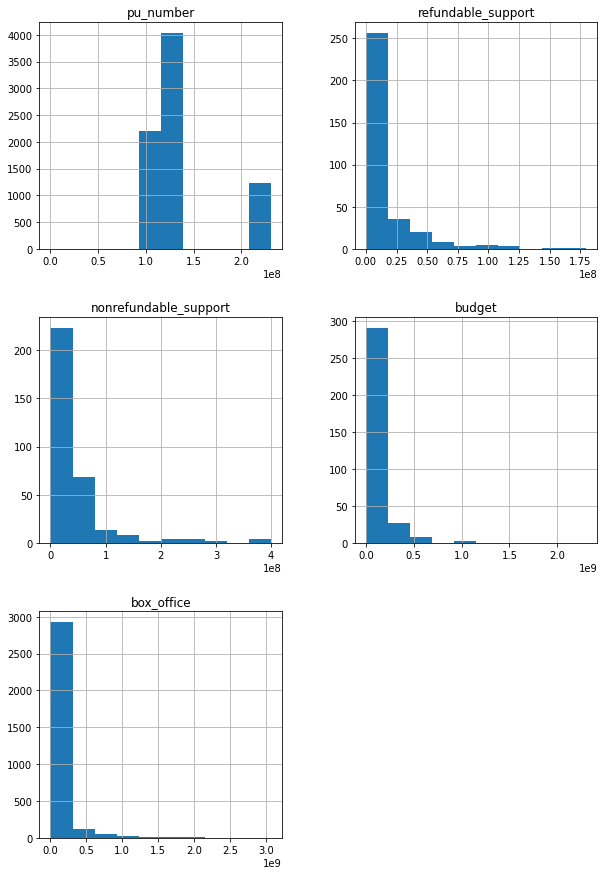

In [10]:
data.hist(figsize=(10, 15));

На первый взгляд сборы небольшие, ниже затраченного бюджета, скорее всего это происходит потому, что не все данные по сборам и бюджету просто отражены в таблице.  
В данных есть пропуски. 
Проведем предобработку данных и вернемся к анализу данных.

## Шаг 2. Предобработка данных

### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Изменим тип данных в `show_start_date` на datetime. Проверим, какие данные хранятся в `age_restriction` и `ratings` и примем решение о необходимости преобразования типа данных.

In [12]:
# преобразуем типы данных
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%f').dt.floor('1D')

In [13]:
data['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

Это категориальные данные, их немного, поэтому оставим их в типе object. Далее разберемся со столбцом `ratings`.

In [14]:
#создаем пустой список для некорректных значений
wrong_raitings_list = []
#функция, которая записывает некорректные данные в список
def wrong_values(raiting):
    try:
        pd.to_numeric(raiting)
    except:
        wrong_raitings_list.append(raiting)

#применяем функцию wrong_values к столбцу ratings        
data['ratings'].apply(wrong_values)
# выводим список с некорректными значениями

wrong_raitings_list
            
        

['99%',
 '28%',
 '97%',
 '99%',
 '99%',
 '83%',
 '64%',
 '91%',
 '94%',
 '62%',
 '79%',
 '90%',
 '19%',
 '88%',
 '83%',
 '91%',
 '97%',
 '89%',
 '97%',
 '88%',
 '83%',
 '94%',
 '94%',
 '91%',
 '98%',
 '98%',
 '99%',
 '79%',
 '88%']

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Переведем проценты в 10-бальную шкалу

In [24]:

# создаем функцию для перевода процентных значений в 10-бальную шкалу
def replace_wrong_values(raiting):
    try:
        raiting = pd.to_numeric(raiting)
    except: 
        raiting = pd.to_numeric(raiting.rstrip('%')) / 100 * 10
    return raiting
        

#применяем функцию wrong_values к столбцу ratings
data['ratings'] = data['ratings'].apply(replace_wrong_values)
data['ratings']

0      7.2
1      6.6
2      6.8
3      6.8
4      6.8
        ..
7481   NaN
7482   5.4
7483   NaN
7484   NaN
7485   6.3
Name: ratings, Length: 7486, dtype: float64

<div style="background-color:lavender; color:#black; text-align:center; padding:2%">
    
**Валентина:** ✔️ Вопрос: Артем , пожскажи, пожалуйста, мой метод избавления от "%" показался мне топорным , может быть есть более локоничный метод?

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7486 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

проанализируем пропуски в значениях `film_studio`, `production_country `, `director`, `producer`, `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`, `ratings`, `genres`, `box_office`.

### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [26]:
#data['producer'].value_counts()
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

В столбцах `film_studio`, `production_country `, `director`, `producer` пропуски заменим на Unknown.

In [19]:
data['film_studio'] = data['film_studio'].fillna('Unknown')
data['production_country'] = data['production_country'].fillna('Unknown')
data['director'] = data['director'].fillna('Unknown')
data['producer'] = data['producer'].fillna('Unknown')
#data.isna().sum()

Проанализируем проупски по рейтингу и жанрам , как много таких ,ч то в обоих столбцах пропуски одновременно

In [20]:
data.loc[(data['ratings'].isna() & data['genres'].isna())].isna().sum()

title                      0
pu_number                  0
show_start_date            0
type                       0
film_studio                0
production_country         0
director                   0
producer                   0
age_restriction            0
refundable_support       951
nonrefundable_support    951
budget                   951
financing_source         951
ratings                  967
genres                   967
box_office               723
dtype: int64

Почти во всех случаях пропуски одновременно и в `ratings` и в  `genres`, поэтому медианным значением не заполнить. Попробуем проверить пару `ratings`-`director`.

In [21]:
data.loc[(data['ratings'].isna() & data['director']=='Unknown')].sum()

title                   0.0
pu_number               0.0
type                    0.0
film_studio             0.0
production_country      0.0
director                0.0
producer                0.0
age_restriction         0.0
refundable_support      0.0
nonrefundable_support   0.0
budget                  0.0
financing_source        0.0
ratings                 0.0
genres                  0.0
box_office              0.0
dtype: float64

In [27]:
data.pivot_table(index='director', values='ratings', aggfunc=['mean', 'median'])

,mean,median
,ratings,ratings
director,,
Йохан Нийенхейс,5.4,5.4
"Н.Орлов, Р.Быков",8.0,8.0
Р.Асхаев,7.5,7.5
Т.Саакян,5.1,5.1
Ф.Бондарчук,5.7,5.7
...,...,...
Яннис Смарагдис,5.3,5.3
Янус Мец Педерсен,7.2,7.2


### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

### Шаг 5. Напишите общий вывод